<a href="https://colab.research.google.com/github/paschalidi/danger-js/blob/master/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Best local minimum found at (x, y) ≈ (-0.009318, 1.581368)
Function value at minimum: 8.106214
Starting point: (0.018633, 0.785179)


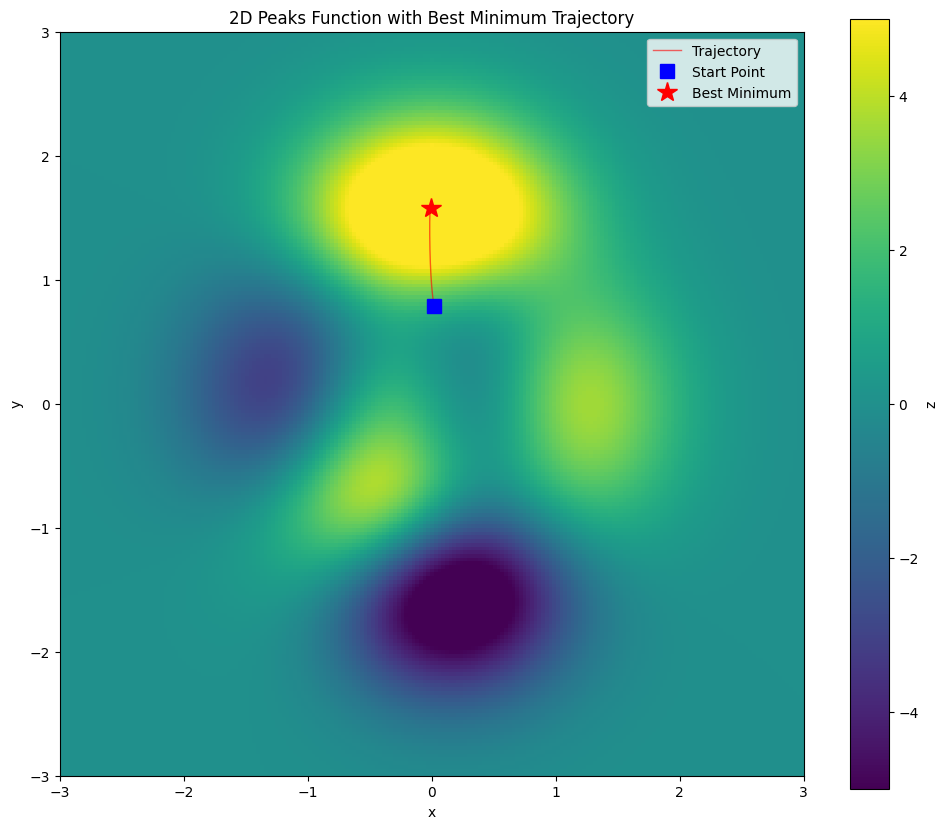

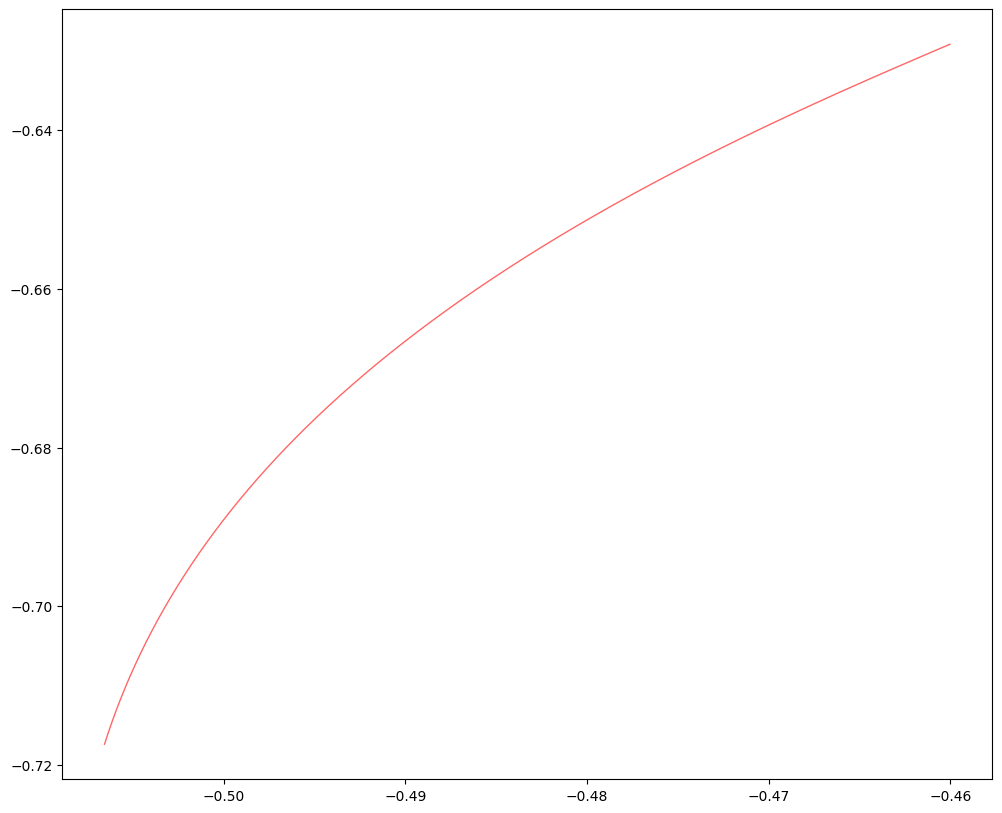

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# The "peaks" function
def peaks(x, y):
    return 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
           - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
           - 1/3*np.exp(-(x+1)**2 - y**2)

# Symbolic setup for derivatives
sx, sy = sym.symbols('sx sy')
sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
     - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
     - 1/3*sym.exp(-(sx+1)**2 - sy**2)

df_x = sym.lambdify((sx,sy), sym.diff(sZ,sx), 'numpy')
df_y = sym.lambdify((sx,sy), sym.diff(sZ,sy), 'numpy')

def find_local_minimum(learning_rate=0.0001, training_epochs=10000):
    start_point = np.random.rand(2)*4-2
    localmin = start_point.copy()
    trajectory = np.zeros((training_epochs+1, 2))
    trajectory[0] = start_point

    for i in range(training_epochs):
        grad = np.array([df_x(localmin[0], localmin[1]),
                         df_y(localmin[0], localmin[1])])
        localmin = localmin + learning_rate * grad
        trajectory[i+1] = localmin

    return localmin, start_point, trajectory

# Run optimization multiple times
num_runs = 10
best_minimum = float('-inf')
best_point = None
best_start = None
best_trajectory = None
final_results = []
for _ in range(num_runs):
    local_min, start_point, trajectory = find_local_minimum()
    local_min_value = peaks(local_min[0], local_min[1])
    final_results.append((local_min, local_min_value, start_point, trajectory))

    if local_min_value > best_minimum:
        best_minimum = local_min_value
        best_point = local_min
        best_start = start_point
        best_trajectory = trajectory

# Plotting
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)

plt.figure(figsize=(12, 10))
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower', cmap='viridis')
plt.colorbar(label='z')

# Plot trajectory
plt.plot(best_trajectory[:, 0], best_trajectory[:, 1], 'r-', linewidth=1, alpha=0.6, label='Trajectory')

# Plot start and end points
plt.plot(best_start[0], best_start[1], 'bs', markersize=10, label='Start Point')
plt.plot(best_point[0], best_point[1], 'r*', markersize=15, label='Best Minimum')

plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Peaks Function with Best Minimum Trajectory')
plt.legend()

print(f"Best local minimum found at (x, y) ≈ ({best_point[0]:.6f}, {best_point[1]:.6f})")
print(f"Function value at minimum: {best_minimum:.6f}")
print(f"Starting point: ({best_start[0]:.6f}, {best_start[1]:.6f})")



plt.figure(figsize=(12, 10))
plt.plot(final_results[0][3][:, 0], final_results[0][3][:, 1], 'r-', linewidth=1, alpha=0.6, label='Trajectory')
plt.show()


